# German Speed Limit Sign Recognition with Tensorflow and Keras

In [2]:
%matplotlib inline
%pylab inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.filterwarnings('ignore')

## Installation of required libs Scikit Learn, TensorFlow, and Keras

In [4]:
!conda install --name root scikit-learn -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_410:

The following packages will be UPDATED:

    mkl:          11.3.3-0           --> 2017.0.1-0        
    numexpr:      2.6.0-np111py35_0  --> 2.6.2-np111py35_0 
    numpy:        1.11.0-py35_2      --> 1.11.3-py35_0     
    scikit-learn: 0.17.1-np111py35_2 --> 0.18.1-np111py35_1
    scipy:        0.17.1-np111py35_1 --> 0.19.0-np111py35_0

mkl-2017.0.1-0 100% |################################| Time: 0:00:01  71.36 MB/s
numpy-1.11.3-p 100% |################################| Time: 0:00:00  58.12 MB/s
numexpr-2.6.2- 100% |################################| Time: 0:00:00  57.27 MB/s
scipy-0.19.0-n 100% |################################| Time: 0:00:00  56.83 MB/s
scikit-learn-0 100% |################################| Time: 0:00:00  47.82 MB/s


In [5]:
from distutils.version import StrictVersion

In [6]:
import sklearn

# should at least be 0.18
assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

sklearn.__version__

'0.18.1'

In [7]:
!conda install --name root -c conda-forge tensorflow -y

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_410:

The following NEW packages will be INSTALLED:

    mock:       2.0.0-py35_0  conda-forge
    pbr:        2.1.0-py35_0  conda-forge
    protobuf:   3.2.0-py35_0  conda-forge
    tensorflow: 1.0.0-py35_0  conda-forge

The following packages will be SUPERSEDED by a higher-priority channel:

    conda:      4.3.16-py35_0             --> 4.2.13-py35_0 conda-forge
    conda-env:  2.6.0-0                   --> 2.6.0-0       conda-forge

conda-env-2.6. 100% |################################| Time: 0:00:00   1.24 MB/s
conda-4.2.13-p 100% |################################| Time: 0:00:00   1.28 MB/s
protobuf-3.2.0 100% |################################| Time: 0:00:00  18.50 MB/s
pbr-2.1.0-py35 100% |################################| Time: 0:00:00  41.90 MB/s
mock-2.0.0-py3 100% |################################| Time: 0:00:00  38.40 MB/s
tensorflow-1

In [8]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# should at least be 1.0
assert StrictVersion(tf.__version__) >= StrictVersion('1.0.0')

tf.__version__

'1.0.0'

In [9]:
!pip install keras

    100% |################################| 204kB 2.8MB/s ta 0:00:01
    100% |################################| 3.1MB 411kB/s eta 0:00:01
  Running setup.py bdist_wheel for keras ... - \ done
  Stored in directory: /home/nbuser/.cache/pip/wheels/93/72/65/4924fd6b1859343291c50774e2df36919ee61c4511dc6a9890
  Running setup.py bdist_wheel for theano ... - \ | / - \ done
  Stored in directory: /home/nbuser/.cache/pip/wheels/d5/5b/93/433299b86e3e9b25f0f600e4e4ebf18e38eb7534ea518eba13
Successfully built keras theano
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import keras as keras

# should at least be 1.2 and use TensorFlow backend
assert StrictVersion(keras.__version__) >= StrictVersion('1.2.2')

keras.__version__

Using TensorFlow backend.


'2.0.3'

# Big Kudos to [Waleed Abdulla](https://medium.com/@waleedka) for providing the initial idea and many of the functions used to prepare and display the images: https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6#.i728o84ib  

## Download data

In [11]:
# https://notebooks.azure.com/faq#service_restrictions
# https://notebooks.azure.com/faq#upload_data
# https://notebooks.azure.com/n/xwZx1vmIroU/notebooks/Getting%20to%20your%20Data%20in%20Azure%20Notebooks.ipynb

In [12]:
!curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/speed-limit-signs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1810k  100 1810k    0     0  3556k      0 --:--:-- --:--:-- --:--:-- 3556k


In [13]:
# https://docs.python.org/3/library/zipfile.html
from zipfile import ZipFile
zip = ZipFile(r'speed-limit-signs.zip')
zip.extractall('.')

In [14]:
!ls -l speed-limit-signs

total 28
drwxr-xr-x 2 nbuser nbuser 4096 Apr 21 09:55 0
drwxr-xr-x 2 nbuser nbuser 4096 Apr 21 09:55 1
drwxr-xr-x 2 nbuser nbuser 4096 Apr 21 09:55 2
drwxr-xr-x 2 nbuser nbuser 4096 Apr 21 09:55 3
drwxr-xr-x 2 nbuser nbuser 4096 Apr 21 09:55 4
drwxr-xr-x 2 nbuser nbuser 4096 Apr 21 09:55 5
-rw-r--r-- 1 nbuser nbuser  380 Apr 21 09:55 README.md


In [15]:
!cat speed-limit-signs/README.md

Data extracted from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

From http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip just the samples for the speed limit signs 

## Format

https://en.wikipedia.org/wiki/Netpbm_format

Can be previewed on a Mac and be processed by http://scikit-image.org/

## Labels
- 0: 30
- 1: 50
- 2: 70
- 3: 80
- 4: 100
- 5: 120

In [16]:
!ls speed-limit-signs/0

00000.ppm  00012.ppm  00024.ppm  00036.ppm  00048.ppm  00060.ppm  00072.ppm
00001.ppm  00013.ppm  00025.ppm  00037.ppm  00049.ppm  00061.ppm  00073.ppm
00002.ppm  00014.ppm  00026.ppm  00038.ppm  00050.ppm  00062.ppm  00074.ppm
00003.ppm  00015.ppm  00027.ppm  00039.ppm  00051.ppm  00063.ppm  00075.ppm
00004.ppm  00016.ppm  00028.ppm  00040.ppm  00052.ppm  00064.ppm  00076.ppm
00005.ppm  00017.ppm  00029.ppm  00041.ppm  00053.ppm  00065.ppm  00077.ppm
00006.ppm  00018.ppm  00030.ppm  00042.ppm  00054.ppm  00066.ppm  00078.ppm
00007.ppm  00019.ppm  00031.ppm  00043.ppm  00055.ppm  00067.ppm
00008.ppm  00020.ppm  00032.ppm  00044.ppm  00056.ppm  00068.ppm
00009.ppm  00021.ppm  00033.ppm  00045.ppm  00057.ppm  00069.ppm
00010.ppm  00022.ppm  00034.ppm  00046.ppm  00058.ppm  00070.ppm
00011.ppm  00023.ppm  00035.ppm  00047.ppm  00059.ppm  00071.ppm


## Analyse and Prepare Image Data

In [17]:
import os
import skimage.data

def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [18]:
# Load datasets.
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")

images, labels = load_data(data_dir)

In [19]:
len(set(labels)), len(images)

(6, 379)

In [20]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

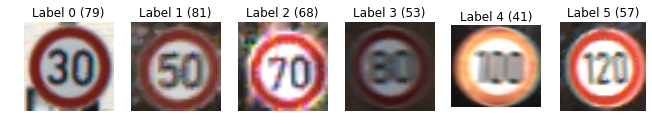

In [21]:
display_images_and_labels(images, labels)

In [22]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (38, 38, 3), min: 12, max: 166
shape: (22, 22, 3), min: 34, max: 148
shape: (48, 48, 3), min: 3, max: 58
shape: (38, 33, 3), min: 8, max: 135
shape: (27, 26, 3), min: 24, max: 187


In [23]:
import skimage.transform

# Resize images
images64 = [skimage.transform.resize(image, (64, 64))
                for image in images]

In [24]:
for image in images64[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (64, 64, 3), min: 0.054400275735294254, max: 0.6428471583946076
shape: (64, 64, 3), min: 0.13333333333333333, max: 0.5657494638480395
shape: (64, 64, 3), min: 0.01819852941176448, max: 0.22518382352941177
shape: (64, 64, 3), min: 0.04503867953431377, max: 0.5090035232843136
shape: (64, 64, 3), min: 0.09411764705882353, max: 0.7076875574448536


In [25]:
import numpy as np

y = np.array(labels)
X = np.array(images64)
y.shape, X.shape

((379,), (379, 64, 64, 3))

## Training a simple Keras model

In [26]:
from keras.utils.np_utils import to_categorical

num_categories = 6

y = to_categorical(y, num_categories)

### Starting with one fully connected layer and a softmax output

In [45]:
# https://keras.io/getting-started/functional-api-guide/
from keras.models import Model
from keras.layers import Dense, Flatten, Input

# this returns a tensor
inputs = Input(shape=(64, 64, 3))

x = Dense(256, activation='relu')(inputs)
x = Flatten()(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(input=inputs, output=predictions)

In [46]:
model.input_shape

(None, 64, 64, 3)

In [47]:
model.output_shape

(None, 6)

### Keras Models need to be compiled (to TensorFlow in our case) before usage

In [48]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### First let make a sense check of the architecture, will it be sufficient? To do so try to overfit it with a very small set of data: http://cs231n.github.io/neural-networks-3/#sanitycheck

In [58]:
# http://cs231n.github.io/neural-networks-3/#sanitycheck
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=3)

In [59]:
# we are only interested in the training data (0.5 % of ~400 = ~20)
X_train.shape, y_train.shape

((18, 64, 64, 3), (18, 6))

In [52]:
# smaller batch sizes might lead to overfitting: https://twitter.com/tomordonez/status/854832345823707137?s=03
model.fit(X_train, y_train, nb_epoch=100, batch_size=100)

Epoch 1/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 2/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 3/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 4/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 5/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 6/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 7/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 8/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 9/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 10/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 11/100
19/19 [==============================] - 0s - loss: 11.0282 - acc: 0.3158
Epoch 12/100
19/19 [==============================] 

### Nope, not good, stuck at low accuracy: if we can not even perfectly match the very small test data, probably not a good model

### Let's try 4 times as many neurons, because it might work: http://cs231n.github.io/neural-networks-1/#power

In [54]:
from keras.models import Model
from keras.layers import Dense, Flatten, Input

# this returns a tensor
inputs = Input(shape=(64, 64, 3))

x = Dense(1024, activation='relu')(inputs)
x = Flatten()(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch=100, batch_size=100)

Epoch 1/100
19/19 [==============================] - 1s - loss: 1.7997 - acc: 0.0526
Epoch 2/100
19/19 [==============================] - 0s - loss: 12.3928 - acc: 0.2105
Epoch 3/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 4/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 5/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 6/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 7/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 8/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 9/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 10/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 11/100
19/19 [==============================] - 0s - loss: 12.7248 - acc: 0.2105
Epoch 12/100
19/19 [==============================] -

### Same problem, what about a second hidden layer, because pratically more than on layer makes training feasible in the first place

In [62]:
from keras.models import Model
from keras.layers import Dense, Flatten, Input

# this returns a tensor
inputs = Input(shape=(64, 64, 3))

x = Dense(512, activation='relu')(inputs)
x = Dense(512, activation='relu')(x)
x = Flatten()(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch=30, batch_size=100)

Epoch 1/30
18/18 [==============================] - 1s - loss: 1.8019 - acc: 0.0000e+00
Epoch 2/30
18/18 [==============================] - 1s - loss: 8.1985 - acc: 0.2222
Epoch 3/30
18/18 [==============================] - 1s - loss: 10.4263 - acc: 0.3333
Epoch 4/30
18/18 [==============================] - 1s - loss: 11.2294 - acc: 0.1667
Epoch 5/30
18/18 [==============================] - 1s - loss: 9.8595 - acc: 0.3333
Epoch 6/30
18/18 [==============================] - 1s - loss: 6.0633 - acc: 0.3889
Epoch 7/30
18/18 [==============================] - 1s - loss: 1.9313 - acc: 0.3333
Epoch 8/30
18/18 [==============================] - 1s - loss: 1.5942 - acc: 0.4444
Epoch 9/30
18/18 [==============================] - 1s - loss: 1.2509 - acc: 0.4444
Epoch 10/30
18/18 [==============================] - 1s - loss: 1.3098 - acc: 0.4444
Epoch 11/30
18/18 [==============================] - 1s - loss: 3.0614 - acc: 0.3333
Epoch 12/30
18/18 [==============================] - 1s - loss: 1.59

### Wow, same amount of neurons, but now we can actually overfit, and have 100% accuracy

In [67]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

18/18 [==============================] - 0s


(0.03239867091178894, 1.0)

### But on unknown data of course we totally suck (might be as low as 30%)

In [68]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

361/361 [==============================] - 8s     


(4.7159433285615453, 0.28808864290694453)

### Split training (80%) from test data (%20) (and make it reproduceable)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Training now takes far longer, as we have far more data, even on a very powerful machine, this might take up to 15 minutes, do not run this, unless you have time and a big machine

In [74]:
from keras.models import Model
from keras.layers import Dense, Flatten, Input

# this returns a tensor
inputs = Input(shape=(64, 64, 3))

# reduced to make this terminate in a reasonable amout of time
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
# x = Dense(512, activation='relu')(inputs)
# x = Dense(512, activation='relu')(x)
x = Flatten()(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# comment it in again if you really want to give it a try...
# model.fit(X_train, y_train, nb_epoch=30, batch_size=100)

Epoch 1/30
303/303 [==============================] - 6s - loss: 7.0338 - acc: 0.1782     
Epoch 2/30
303/303 [==============================] - 3s - loss: 4.4325 - acc: 0.2409     
Epoch 3/30
303/303 [==============================] - 3s - loss: 2.0091 - acc: 0.2937     
Epoch 4/30
303/3

In [78]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=100)

Epoch 1/10
303/303 [==============================] - 2s - loss: 0.2104 - acc: 0.9406     
Epoch 2/10
303/303 [==============================] - 2s - loss: 0.1593 - acc: 0.9637     
Epoch 3/10
303/303 [==============================] - 3s - loss: 0.0744 - acc: 0.9967     
Epoch 4/10
303/3

In [79]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

303/303 [==============================] - 1s     


(0.08017762833991067, 0.97689768976897695)

In [80]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

76/76 [==============================] - 0s     


(1.7881685809085244, 0.63157894423133454)

### This takes a lot of time to train, and still sucks on test data, can we do better?

### Turns out we can using a standard CNN model with many more layers, but far less neurons

In [82]:
# VGG related, pretty standard architecture, not very deep
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D

# this returns a tensor
inputs = Input(shape=(64, 64, 3))

# a layer instance is callable on a tensor, and returns a tensor
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(inputs)
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(x)
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.50)(x)

predictions = Dense(6, activation='softmax')(x)

# this creates a model that includes
# the Input layer and three Dense layers
model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch=30, batch_size=100)

Epoch 1/30
303/303 [==============================] - 8s - loss: 3.1309 - acc: 0.2046     
Epoch 2/30
303/303 [==============================] - 7s - loss: 1.7988 - acc: 0.1980     
Epoch 3/30
303/303 [==============================] - 6s - loss: 1.7764 - acc: 0.2013     
Epoch 4/30
303/3

In [83]:
model.fit(X_train, y_train, nb_epoch=30, batch_size=100)

Epoch 1/30
303/303 [==============================] - 7s - loss: 1.6865 - acc: 0.2904     
Epoch 2/30
303/303 [==============================] - 6s - loss: 1.5390 - acc: 0.3729     
Epoch 3/30
303/303 [==============================] - 6s - loss: 1.5904 - acc: 0.3498     
Epoch 4/30
303/3

In [84]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

303/303 [==============================] - 2s     


(0.05323919913003055, 0.98349834983498352)

In [85]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

76/76 [==============================] - 0s     


(0.44474137221512039, 0.85526316103182343)

### Let us try a few random samples on the test data

In [86]:
import random

# Pick 10 random images for test data set
random.seed(3) # to make this deterministic
sample_indexes = random.sample(range(len(X_test)), 10)
sample_images = [X_test[i] for i in sample_indexes]
sample_labels = [y_test[i] for i in sample_indexes]

In [87]:
sample_labels

[array([ 0.,  0.,  0.,  0.,  1.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0.,  0.,  1.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.,  0.,  0.,  1.,  0.,  0.])]

In [88]:
# that is a tad hard to read, just choose the category

ground_truth = np.argmax(sample_labels, axis=1)
ground_truth

array([4, 1, 3, 2, 1, 1, 3, 0, 5, 3])

In [89]:
# now make the prediction for the sample inputs
X_sample = np.array(sample_images)
prediction = model.predict(X_sample)

In [90]:
# softmax predictions would be even harder to read, again just choose the hightst category

predicted_categories = np.argmax(prediction, axis=1)
predicted_categories

array([4, 1, 3, 2, 1, 1, 0, 0, 5, 3])

In [91]:
# Display the predictions and the ground truth visually.
def display_prediction (images, true_labels, predicted_labels):
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(true_labels)):
        truth = true_labels[i]
        prediction = predicted_labels[i]
        plt.subplot(5, 2,1+i)
        plt.axis('off')
        color='green' if truth == prediction else 'red'
        plt.text(80, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
                 fontsize=12, color=color)
        plt.imshow(images[i])

## Visualizing where we were right (might be up to 9 out of 10)

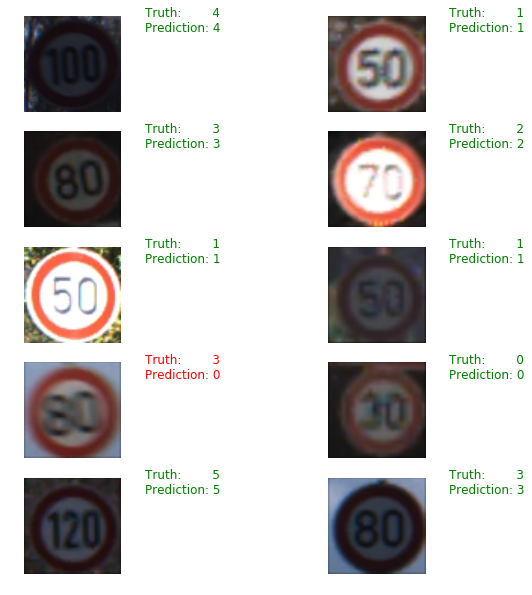

In [92]:
display_prediction(sample_images, ground_truth, predicted_categories)

In [93]:
!mkdir models

In [94]:
model.save('models/conv-vgg.h5')

In [96]:
# use the Data Menu Item to download from this directory
!ls -l models

total 33868
-rw-r--r-- 1 nbuser nbuser 34676888 Apr 21 10:57 conv-vgg.h5


In [97]:
# https://notebooks.azure.com/faq#download_data
# or use https://transfer.sh/
!curl --upload-file ./models/conv-vgg.h5 https://transfer.sh/conv-vgg.h5

https://transfer.sh/g1kqQ/conv-vgg.h5